In [1]:
import requests

URL = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.16121/dados?'
formato = 'csv'
dataInicial = '01/01/2000'
dataFinal = '31/12/2020'
parameters = {'formato':formato, 'dataInicial':dataInicial, 'dataFinal':dataFinal}

response = requests.get(url = URL, params = parameters)

In [2]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(response.content.decode('utf8')), sep=';', decimal=',')
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
df

,data,valor
0,2000-01-01,0.63
1,2000-02-01,0.32
2,2000-03-01,0.16
3,2000-04-01,0.62
4,2000-05-01,0.19
...,...,...
247,2020-08-01,-0.11
248,2020-09-01,0.17
249,2020-10-01,0.52
250,2020-11-01,0.36


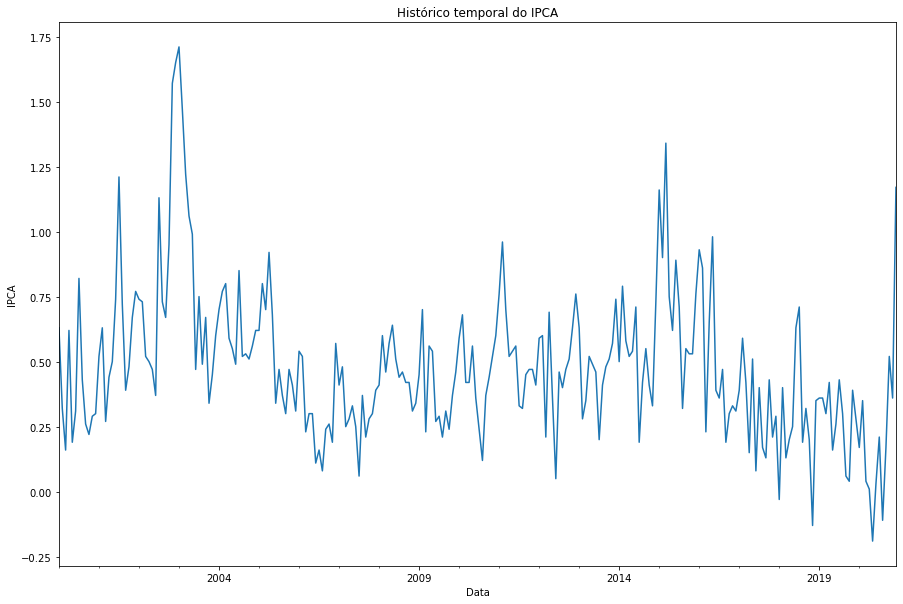

In [3]:
import matplotlib.pyplot as plt

df.plot(x='data',y='valor', figsize=(15,10), legend=False, xlabel='Data', ylabel='IPCA', title='Histórico temporal do IPCA')
plt.show()